In [126]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [127]:
#read data with pandas library
!wget https://zenodo.org/record/4265301/files/dataset.xlsx?download=1 # download file dataset file
data = pd.read_excel('/content/dataset.xlsx?download=1') # I wrote code on Google Colab -> dont forget set necessary file path

--2021-01-08 15:51:50--  https://zenodo.org/record/4265301/files/dataset.xlsx?download=1
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25894 (25K) [application/octet-stream]
Saving to: ‘dataset.xlsx?download=1.3’

dataset.xlsx?downlo 100%[===================>]  25.29K  --.-KB/s    in 0.1s    

2021-01-08 15:51:51 (233 KB/s) - ‘dataset.xlsx?download=1.3’ saved [25894/25894]



In [128]:
data.head(3) #First 3 samples of the our dataset:

,Name,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
0,Alarmio-master,22,17,3,169,1.4,1.0,0.364583,2.000000,5.802083,27.260802,3.567901,3.427686,4.367769,21.252630,5.464506,1.968750
1,AndroidAsyncHTTP-master,11,20,14,494,4.7,6.0,0.474684,2.208861,24.006329,25.996479,10.336268,3.172492,2.727170,17.430380,5.158451,2.177215
2,android-pdf-viewer-master,2,1,0,4,0.0,12.2,0.000000,0.500000,1.833333,18.280000,4.560000,1.727273,3.454545,9.666667,2.560000,1.666667


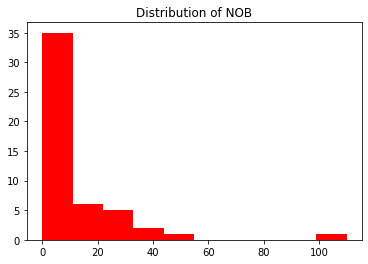

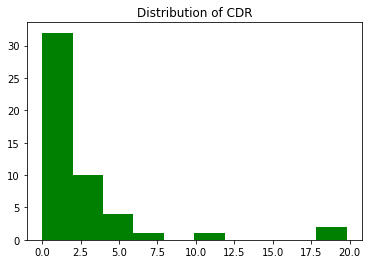

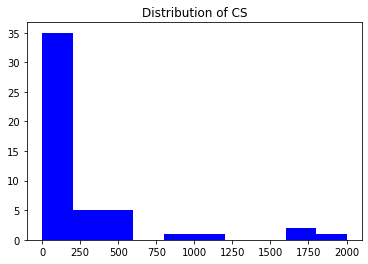

'\nI see that our data is not distributed in accordance with the Normal Distribution. Therefore, I will prefer Spearman Correlation method instead of Pearson correlation.\n'

In [129]:
#show the distribution of 3 metrics
def plotHist(columnIndex,columnName,colorName):
  selected_data = data[columnName]
  plt.hist(selected_data, bins=10,color=colorName)
  plt.title("Distribution of "+columnName)
  plt.show()

without_name = data.columns.values[1:]
# random pick
plotHist(0,without_name[0],"red")
plotHist(4,without_name[4],"green")
plotHist(3,without_name[3],"blue")
# print all metric with for loop
"""for i in range(len(without_name)):
  plotHist(i,without_name[i],"green")
"""
"""
I see that our data is not distributed in accordance with the Normal Distribution. Therefore, I will prefer Spearman Correlation method instead of Pearson correlation.
"""

In [130]:
#Min max scaler for all data
# ['Name' 'NOB' 'V' 'SH' 'CS' 'CDR' 'TD' 'NOC' 'CBO' 'RFC' 'LOC' 'CLOC' 'FanIn' 'FanOut' 'LCOM' 'WMC' 'DIT']
get_column_name = data.columns.values
# ['NOB' 'V' 'SH' 'CS' 'CDR' 'TD' 'NOC' 'CBO' 'RFC' 'LOC' 'CLOC' 'FanIn' 'FanOut' 'LCOM' 'WMC' 'DIT']
without_name = get_column_name[1:]
# MinMaxScaler object
min_max_scaler = MinMaxScaler()
# copy frame
min_max_data = data.copy()
#Min max operation -> transform data
min_max_data[without_name] = min_max_scaler.fit_transform(min_max_data[without_name])
# print transformed data
min_max_data.head(3)


,Name,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
0,Alarmio-master,0.200000,0.055556,0.069767,0.0845,0.070707,0.081967,0.450368,0.547340,0.241690,0.328644,0.215585,0.467183,0.678344,0.483014,0.493334,0.904251
1,AndroidAsyncHTTP-master,0.100000,0.065359,0.325581,0.2470,0.237374,0.491803,0.586374,0.604499,1.000000,0.295288,0.624553,0.432401,0.423548,0.396145,0.465703,1.000000
2,android-pdf-viewer-master,0.018182,0.003268,0.000000,0.0020,0.000000,1.000000,0.000000,0.136835,0.076369,0.091712,0.275531,0.235422,0.536514,0.219697,0.231116,0.765504


# Part1 (Statistical Correlation Analysis)

In [132]:
# Show the correlation matrix of all metrics
correlation_of_all_matrix = min_max_data.corr(method='spearman')
correlation_of_all_matrix


,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
NOB,1.000000,0.694733,0.587592,0.691274,0.373251,0.133383,0.407858,0.353351,0.447180,0.349883,0.369028,0.458483,0.277107,0.062748,0.507420,0.245963
V,0.694733,1.000000,0.629663,0.624194,0.280358,0.296757,0.409002,0.426221,0.345986,0.243636,0.208594,0.468565,0.289585,0.029765,0.397770,0.110767
SH,0.587592,0.629663,1.000000,0.618509,0.384657,-0.026546,0.512876,0.391886,0.425499,0.129174,0.204069,0.278723,0.156120,-0.016116,0.349367,0.107688
CS,0.691274,0.624194,0.618509,1.000000,0.548113,0.194611,0.402859,0.577439,0.492868,0.440458,0.260596,0.456943,0.388502,0.065511,0.569857,0.218801
CDR,0.373251,0.280358,0.384657,0.548113,1.000000,0.013400,0.192707,0.212007,0.240992,0.328527,0.171773,0.243709,0.237237,-0.038683,0.343628,0.123330
TD,0.133383,0.296757,-0.026546,0.194611,0.013400,1.000000,-0.179659,0.013652,-0.126364,-0.031098,0.114297,0.239077,0.240135,0.017159,0.127638,0.352010
NOC,0.407858,0.409002,0.512876,0.402859,0.192707,-0.179659,1.000000,0.667344,0.584086,-0.120165,0.297347,0.268289,-0.074350,-0.013518,0.173468,-0.163788
CBO,0.353351,0.426221,0.391886,0.577439,0.212007,0.013652,0.667344,1.000000,0.421247,0.177024,0.250408,0.594578,0.240953,0.109694,0.492616,0.000144
RFC,0.447180,0.345986,0.425499,0.492868,0.240992,-0.126364,0.584086,0.421247,1.000000,0.134608,0.381636,0.414878,0.072564,0.444076,0.529367,0.237368
LOC,0.349883,0.243636,0.129174,0.440458,0.328527,-0.031098,-0.120165,0.177024,0.134608,1.000000,0.126681,0.554326,0.618676,-0.065455,0.678224,0.181072


In [133]:
# P values of Spearman Correlation Table

import scipy
#result = scipy.stats.spearmanr(correlation_of_all_matrix)
result = scipy.stats.spearmanr(data[without_name])
print(result.pvalue) # print all P values of Spearman Correlation Table

# array to dataframe -> easy view
p_values = pd.DataFrame(result.pvalue.round(4),  index=without_name,columns=without_name)
p_values
#write your code here

[[0.00000000e+00 2.18327283e-08 7.25068293e-06 2.73686626e-08
  7.59028233e-03 3.55778386e-01 3.28147533e-03 1.18306573e-02
  1.13074215e-03 1.27474197e-02 8.35877323e-03 8.12622838e-04
  5.13886369e-02 6.65084859e-01 1.69231351e-04 8.51073958e-02]
 [2.18327283e-08 0.00000000e+00 9.64380315e-07 1.27485409e-06
  4.86054466e-02 3.63748334e-02 3.18684954e-03 2.02677185e-03
  1.38492191e-02 8.81958549e-02 1.46024167e-01 5.99374020e-04
  4.13686431e-02 8.37422412e-01 4.22857387e-03 4.43801192e-01]
 [7.25068293e-06 9.64380315e-07 0.00000000e+00 1.69442897e-06
  5.81320990e-03 8.54805640e-01 1.39950923e-04 4.88526780e-03
  2.06656836e-03 3.71294407e-01 1.55173054e-01 4.99897425e-02
  2.78954677e-01 9.11549686e-01 1.28887263e-02 4.56647540e-01]
 [2.73686626e-08 1.27485409e-06 1.69442897e-06 0.00000000e+00
  3.78281036e-05 1.75642587e-01 3.72437837e-03 1.13188297e-05
  2.76612558e-04 1.36899426e-03 6.75782129e-02 8.50617165e-04
  5.30209812e-03 6.51268382e-01 1.56349307e-05 1.26863219e-01]
 [7.

,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
NOB,0.0000,0.0000,0.0000,0.0000,0.0076,0.3558,0.0033,0.0118,0.0011,0.0127,0.0084,0.0008,0.0514,0.6651,0.0002,0.0851
V,0.0000,0.0000,0.0000,0.0000,0.0486,0.0364,0.0032,0.0020,0.0138,0.0882,0.1460,0.0006,0.0414,0.8374,0.0042,0.4438
SH,0.0000,0.0000,0.0000,0.0000,0.0058,0.8548,0.0001,0.0049,0.0021,0.3713,0.1552,0.0500,0.2790,0.9115,0.0129,0.4566
CS,0.0000,0.0000,0.0000,0.0000,0.0000,0.1756,0.0037,0.0000,0.0003,0.0014,0.0676,0.0009,0.0053,0.6513,0.0000,0.1269
CDR,0.0076,0.0486,0.0058,0.0000,0.0000,0.9264,0.1800,0.1394,0.0918,0.0198,0.2330,0.0881,0.0971,0.7897,0.0146,0.3935
TD,0.3558,0.0364,0.8548,0.1756,0.9264,0.0000,0.2119,0.9250,0.3819,0.8302,0.4293,0.0945,0.0930,0.9059,0.3771,0.0122
NOC,0.0033,0.0032,0.0001,0.0037,0.1800,0.2119,0.0000,0.0000,0.0000,0.4058,0.0360,0.0596,0.6078,0.9258,0.2283,0.2557
CBO,0.0118,0.0020,0.0049,0.0000,0.1394,0.9250,0.0000,0.0000,0.0023,0.2188,0.0794,0.0000,0.0919,0.4483,0.0003,0.9992
RFC,0.0011,0.0138,0.0021,0.0003,0.0918,0.3819,0.0000,0.0023,0.0000,0.3513,0.0062,0.0027,0.6165,0.0012,0.0001,0.0970
LOC,0.0127,0.0882,0.3713,0.0014,0.0198,0.8302,0.4058,0.2188,0.3513,0.0000,0.3807,0.0000,0.0000,0.6515,0.0000,0.2082


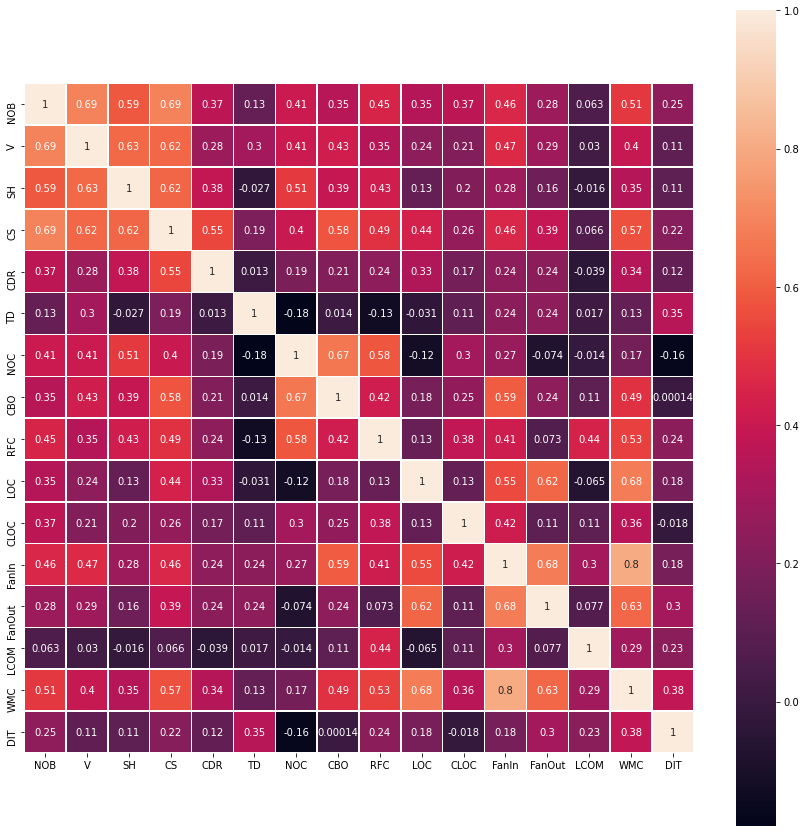

In [134]:
#If you want to see heatmap of the correlation matrix, you can launch code below:
fig, ax = plt.subplots(figsize=(15,15)) # figsize -> 15 is readable
sns.heatmap(correlation_of_all_matrix, xticklabels=correlation_of_all_matrix.columns.values, yticklabels=correlation_of_all_matrix.columns.values,square=True,annot=True,linewidths=.5,ax=ax)


In [135]:
#Correlation between External Metrics & TD
# TD metrics = CDR TD
# External metric = NOB V SH CS

External_TD_metric = min_max_data[['NOB', 'V', 'SH', 'CS', 'CDR', 'TD']].copy()
correlation_of_External_TD_metric = External_TD_metric.corr(method='spearman')
correlation_of_External_TD_metric

,NOB,V,SH,CS,CDR,TD
NOB,1.000000,0.694733,0.587592,0.691274,0.373251,0.133383
V,0.694733,1.000000,0.629663,0.624194,0.280358,0.296757
SH,0.587592,0.629663,1.000000,0.618509,0.384657,-0.026546
CS,0.691274,0.624194,0.618509,1.000000,0.548113,0.194611
CDR,0.373251,0.280358,0.384657,0.548113,1.000000,0.013400
TD,0.133383,0.296757,-0.026546,0.194611,0.013400,1.000000


In [136]:
#Correlation between Internal Metrics & TD
# TD metrics = CDR TD
# Internal metrics = NOC CBO RFC LOC CLOC FanIn FanOut LCOM WMC DIT
Internal_TD_metric = min_max_data[['CDR', 'TD','NOC', 'CBO', 'RFC', 'LOC', 'CLOC', 'FanIn', 'FanOut', 'LCOM', 'WMC', 'DIT']].copy()
correlation_of_Internal_TD_metric = Internal_TD_metric.corr(method='spearman')
correlation_of_Internal_TD_metric


,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
CDR,1.000000,0.013400,0.192707,0.212007,0.240992,0.328527,0.171773,0.243709,0.237237,-0.038683,0.343628,0.123330
TD,0.013400,1.000000,-0.179659,0.013652,-0.126364,-0.031098,0.114297,0.239077,0.240135,0.017159,0.127638,0.352010
NOC,0.192707,-0.179659,1.000000,0.667344,0.584086,-0.120165,0.297347,0.268289,-0.074350,-0.013518,0.173468,-0.163788
CBO,0.212007,0.013652,0.667344,1.000000,0.421247,0.177024,0.250408,0.594578,0.240953,0.109694,0.492616,0.000144
RFC,0.240992,-0.126364,0.584086,0.421247,1.000000,0.134608,0.381636,0.414878,0.072564,0.444076,0.529367,0.237368
LOC,0.328527,-0.031098,-0.120165,0.177024,0.134608,1.000000,0.126681,0.554326,0.618676,-0.065455,0.678224,0.181072
CLOC,0.171773,0.114297,0.297347,0.250408,0.381636,0.126681,1.000000,0.416789,0.109636,0.107619,0.355080,-0.017867
FanIn,0.243709,0.239077,0.268289,0.594578,0.414878,0.554326,0.416789,1.000000,0.679297,0.296355,0.802910,0.179395
FanOut,0.237237,0.240135,-0.074350,0.240953,0.072564,0.618676,0.109636,0.679297,1.000000,0.076982,0.626327,0.295389
LCOM,-0.038683,0.017159,-0.013518,0.109694,0.444076,-0.065455,0.107619,0.296355,0.076982,1.000000,0.291312,0.229251


# Part2 (ML Modelling)



We are going to use 5 different ML Regression Models to predict Technical Debt values:

>Linear Regression

>Support Vector Regression

>Decision Tree Regression

>Random Forest Tree Regression

>Multi-layer Perceptron

70% of our data will be used as training set and 30% as test set. Training and test sets will be randomly. The “random_state” variable will have a fixed value so that all models get the same random data. In this way, we will be able to evaluate the success rate of the different models objectively.


In [170]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import NearestCentroid

random_state_fixed=53


#This function plots graphs to improve visual confirmation
def plotGraph(y_test,y_pred,regressorName):
  #Plot the Scatter Graph to see results better
  plt.scatter(y_test, y_pred, color = 'blue')
  plt.scatter(y_test,y_test,color = 'red')
  
  plt.title(regressorName)
  plt.legend(['Predicted Value','Original Value'])
  plt.show()

#Linear Regressor is one of the best choice for the data that is correlated linearly:

def linearRegression(X_train,y_train,X_test,y_test):
  # Create the regressor: reg_all
  reg_all = LinearRegression()
# Fit the regressor to the training data
  reg_all.fit(X_train, y_train)


  # Predict on the test data: y_pred
  y_pred = reg_all.predict(X_test)

  # Compute and print R^2 and RMSE
  r2 = reg_all.score(X_test, y_test)
  print("Linear Regression - R-Squared Value: {}".format(r2))
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  print("Linear Regression - Root Mean Squared Error: {}".format(rmse))
  return reg_all,r2,rmse



#SVR is also one of the most common regressor that used for regression predictions
def svrRegression(X_train,y_train,X_test,y_test,kernell):

  # Create the regressor: reg_all
  reg_all = SVR(kernel=kernell)
  # Fit the regressor to the training data
  reg_all.fit(X_train, y_train)
  # Predict on the test data: y_pred
  y_pred = reg_all.predict(X_test)
  # Compute and print R^2 and RMSE
  print("SVR Regression - R-Squared Value: {}".format(reg_all.score(X_test, y_test)))
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  print("SVR Regression - Root Mean Squared Error: {}".format(rmse))
  return reg_all,r2,rmse
  


def decisionTreeRegression(X_train,y_train,X_test,y_test):
  # Create the regressor: reg_all
  reg_all = DecisionTreeRegressor()
  # Fit the regressor to the training data
  reg_all.fit(X_train, y_train)
  # Predict on the test data: y_pred
  y_pred = reg_all.predict(X_test)

  # Compute and print R^2 and RMSE
  r2 = reg_all.score(X_test, y_test)
  print("DecisionTreeRegressor - R-Squared Value: {}".format(r2))
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  print("DecisionTreeRegressor - Root Mean Squared Error: {}".format(rmse))
  return reg_all,r2,rmse

def randomDecTreeRegression(X_train,y_train,X_test,y_test):
  # Create the regressor: reg_all
  reg_all = RandomForestRegressor()
  # Fit the regressor to the training data
  reg_all.fit(X_train, y_train)

  # Predict on the test data: y_pred
  y_pred = reg_all.predict(X_test)

  # Compute and print R^2 and RMSE
  r2 = reg_all.score(X_test, y_test)
  print("Random Forest Tree Regression - R-Squared Value: {}".format(r2))
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  print("Random Forest Tree Regression - Root Mean Squared Error: {}".format(rmse))
  return reg_all,r2,rmse



#Multi-layer Perceptron regressor: 'This model optimizes the squared-loss using LBFGS or stochastic gradient descent.'
def mlpRegressor(X_train,y_train,X_test,y_test):
  # Create the regressor: reg_all
  reg_all = MLPRegressor()
  # Fit the regressor to the training data
  reg_all.fit(X_train, y_train)

  # Predict on the test data: y_pred
  y_pred = reg_all.predict(X_test)

  # Compute and print R^2 and RMSE
  r2 = reg_all.score(X_test, y_test)
  print("MultiLayer Perceptron Regression - R-Squared Value: {}".format(r2))
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  print("MultiLayer Perceptron Regression - Root Mean Squared Error: {}".format(rmse))
  return reg_all,r2,rmse


In this step (step 3), we will try to estimate Technical Debt using internal metrics.

In [162]:
#split data into train and test data

# External metric = NOB V SH CS
External_metric = ['NOB', 'V', 'SH', 'CS']
# TD metrics = CDR TD
TD_metrics = ['CDR', 'TD']
# Internal metrics = NOC CBO RFC LOC CLOC FanIn FanOut LCOM WMC DIT
Internal_metrics = ['NOC', 'CBO', 'RFC', 'LOC', 'CLOC', 'FanIn', 'FanOut', 'LCOM', 'WMC', 'DIT']
# copy dataframe
External_metric_data = data.copy()
External_metric_data = External_metric_data[External_metric]

TD_metrics_data = data.copy()
TD_metrics_data = TD_metrics_data[TD_metrics]

Internal_metrics_data = data.copy()
Internal_metrics_data = Internal_metrics_data[Internal_metrics]

splitted_data = {}
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = random_state_fixed)
for i in TD_metrics_data:
  X_train, X_test, y_train, y_test = train_test_split(Internal_metrics_data, TD_metrics_data[i], test_size = 0.3, random_state = random_state_fixed)
  splitted_data[i] = [X_train, X_test, y_train, y_test]

X_train_All, X_test_All, y_train_All, y_test_All = train_test_split(Internal_metrics_data, TD_metrics_data, test_size = 0.3, random_state = random_state_fixed)

Linear Regression - R-Squared Value: -0.25353936900603324
Linear Regression - Root Mean Squared Error: 5.5891842925137265


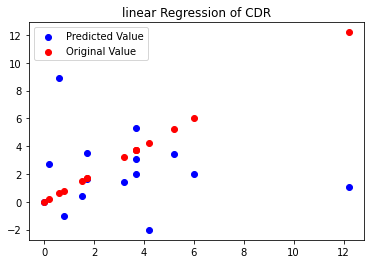

Linear Regression - R-Squared Value: -0.17296753046920776
Linear Regression - Root Mean Squared Error: 3.2337817476477237


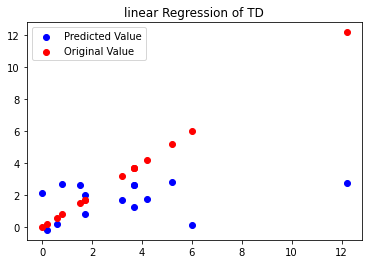

Linear Regression - R-Squared Value: -0.23230981752429883
Linear Regression - Root Mean Squared Error: 4.565978835206188


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


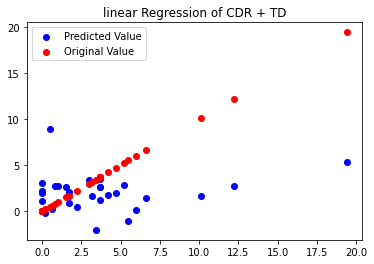

In [163]:
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )
for i in splitted_data:
  model,r2,rmse = linearRegression(splitted_data[i][0], splitted_data[i][2], splitted_data[i][1], splitted_data[i][3])
  plotGraph(y_test,model.predict(X_test),'linear Regression of '+i)


model,r2,rmse = linearRegression(X_train_All, y_train_All, X_test_All, y_test_All)
plotGraph(y_test_All,model.predict(X_test_All), "linear Regression of CDR + TD")

SVR Regression - R-Squared Value: -0.36047959392586626
SVR Regression - Root Mean Squared Error: 5.822713972132651


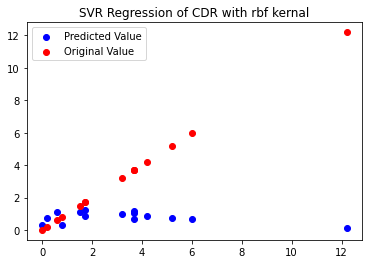

SVR Regression - R-Squared Value: -0.38051124598601405
SVR Regression - Root Mean Squared Error: 3.5082269841510065


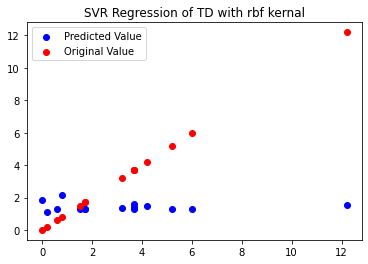

SVR Regression - R-Squared Value: -0.4409516832331666
SVR Regression - Root Mean Squared Error: 5.992446289982828


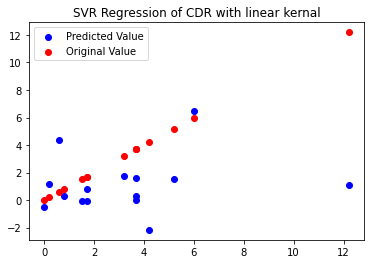

SVR Regression - R-Squared Value: -0.35598963174233944
SVR Regression - Root Mean Squared Error: 3.4769295789994104


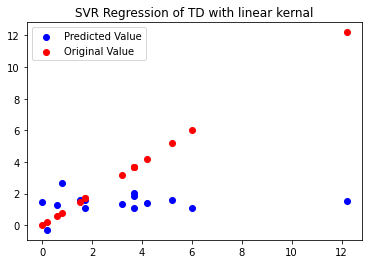

SVR Regression - R-Squared Value: -0.44440569967729115
SVR Regression - Root Mean Squared Error: 5.9996240529955145


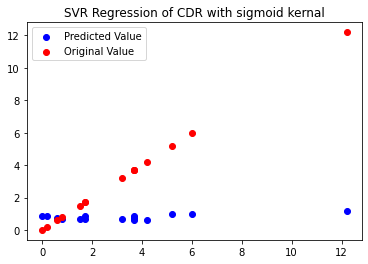

SVR Regression - R-Squared Value: -0.38355668622725236
SVR Regression - Root Mean Squared Error: 3.5120944679592196


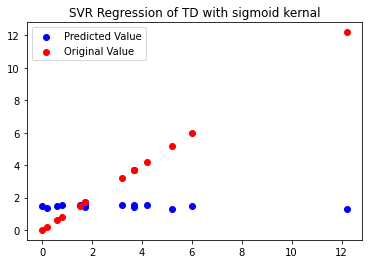

SVR Regression - R-Squared Value: -0.3476156057405251
SVR Regression - Root Mean Squared Error: 5.795120310349974


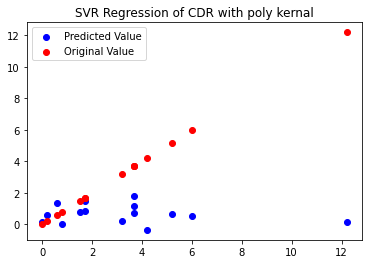

SVR Regression - R-Squared Value: -0.39172158474997043
SVR Regression - Root Mean Squared Error: 3.522442331813006


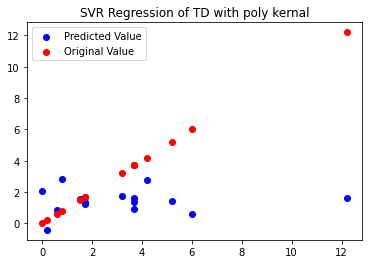

' Precomputed matrix must be a square matrix. Input is a 35x10 matrix.i dont use it '

In [178]:
#Model for SVR Regression (show also R-Squared Value and Root Mean Squared Error )
for i in splitted_data:
  model,r2,rmse = svrRegression(splitted_data[i][0], splitted_data[i][2], splitted_data[i][1], splitted_data[i][3],'rbf')
  plotGraph(y_test,model.predict(X_test),'SVR Regression of ' + i +" with rbf kernal")
"""CDR + TD not working on SVR regression"""
for i in splitted_data:
  model,r2,rmse = svrRegression(splitted_data[i][0], splitted_data[i][2], splitted_data[i][1], splitted_data[i][3],'linear')
  plotGraph(y_test,model.predict(X_test),'SVR Regression of ' + i +" with linear kernal")
"""CDR + TD not working on SVR regression"""
for i in splitted_data:
  model,r2,rmse = svrRegression(splitted_data[i][0], splitted_data[i][2], splitted_data[i][1], splitted_data[i][3],'sigmoid')
  plotGraph(y_test,model.predict(X_test),'SVR Regression of ' + i +" with sigmoid kernal")
"""CDR + TD not working on SVR regression"""
for i in splitted_data:
  model,r2,rmse = svrRegression(splitted_data[i][0], splitted_data[i][2], splitted_data[i][1], splitted_data[i][3],'poly')
  plotGraph(y_test,model.predict(X_test),'SVR Regression of ' + i +" with poly kernal")
"""CDR + TD not working on SVR regression"""
""" Precomputed matrix must be a square matrix. Input is a 35x10 matrix.i dont use it """


DecisionTreeRegressor - R-Squared Value: -0.5165752950702147
DecisionTreeRegressor - Root Mean Squared Error: 6.147682490174652


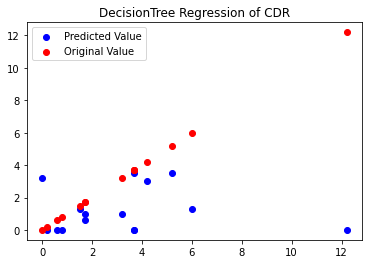

DecisionTreeRegressor - R-Squared Value: -0.8082794101518491
DecisionTreeRegressor - Root Mean Squared Error: 4.015138021704027


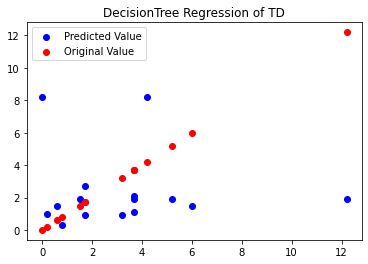

DecisionTreeRegressor - R-Squared Value: -0.4985656265269775
DecisionTreeRegressor - Root Mean Squared Error: 5.035143162479758


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


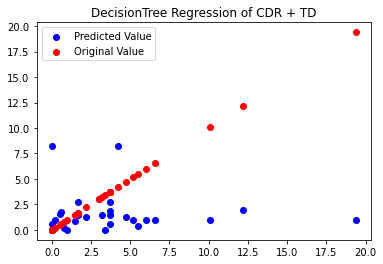

In [192]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
for i in splitted_data:
  model,r2,rmse = decisionTreeRegression(splitted_data[i][0], splitted_data[i][2], splitted_data[i][1], splitted_data[i][3])
  plotGraph(y_test,model.predict(X_test),'DecisionTree Regression of '+i)


model,r2,rmse = decisionTreeRegression(X_train_All, y_train_All, X_test_All, y_test_All)
plotGraph(y_test_All,model.predict(X_test_All), "DecisionTree Regression of CDR + TD")

Random Forest Tree Regression - R-Squared Value: 0.013634614973052184
Random Forest Tree Regression - Root Mean Squared Error: 4.957906728986874


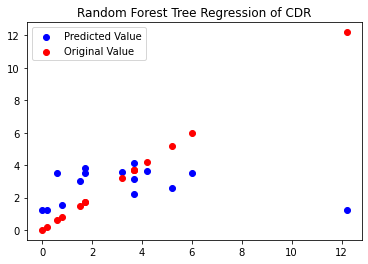

Random Forest Tree Regression - R-Squared Value: -0.21515959849247768
Random Forest Tree Regression - Root Mean Squared Error: 3.2914280892443433


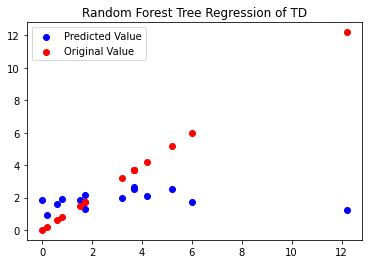

Random Forest Tree Regression - R-Squared Value: -0.024551103495562967
Random Forest Tree Regression - Root Mean Squared Error: 4.1633292006918365


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


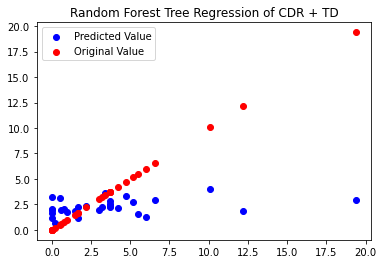

In [182]:
#Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
for i in splitted_data:
  model,r2,rmse = randomDecTreeRegression(splitted_data[i][0], splitted_data[i][2], splitted_data[i][1], splitted_data[i][3])
  plotGraph(y_test,model.predict(X_test),'Random Forest Tree Regression of '+i)


model,r2,rmse = randomDecTreeRegression(X_train_All, y_train_All, X_test_All, y_test_All)
plotGraph(y_test_All,model.predict(X_test_All), "Random Forest Tree Regression of CDR + TD")


MultiLayer Perceptron Regression - R-Squared Value: -0.13732646648758995
MultiLayer Perceptron Regression - Root Mean Squared Error: 5.323803453798055


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


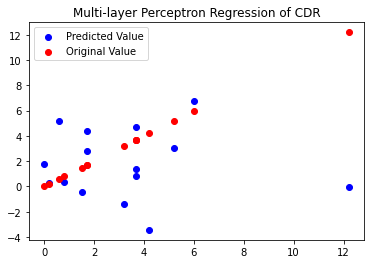

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MultiLayer Perceptron Regression - R-Squared Value: -0.10057249948400049
MultiLayer Perceptron Regression - Root Mean Squared Error: 3.1323987255881685


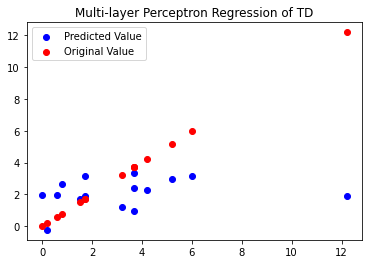

MultiLayer Perceptron Regression - R-Squared Value: -0.014722014971498
MultiLayer Perceptron Regression - Root Mean Squared Error: 4.14331050616914


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


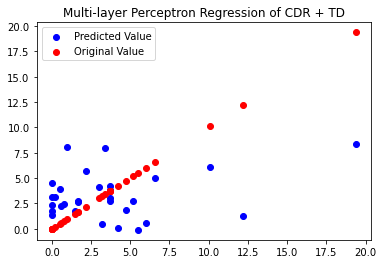

In [183]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )
for i in splitted_data:
  model,r2,rmse = mlpRegressor(splitted_data[i][0], splitted_data[i][2], splitted_data[i][1], splitted_data[i][3])
  plotGraph(y_test,model.predict(X_test),'Multi-layer Perceptron Regression of '+i)


model,r2,rmse = mlpRegressor(X_train_All, y_train_All, X_test_All, y_test_All)
plotGraph(y_test_All,model.predict(X_test_All), "Multi-layer Perceptron Regression of CDR + TD")

In this step (step 4), we will try to estimate Technical Debt using external metrics.

In [187]:
#split data into train and test data

# External metric = NOB V SH CS
External_metric = ['NOB', 'V', 'SH', 'CS']
# TD metrics = CDR TD
TD_metrics = ['CDR', 'TD']
# Internal metrics = NOC CBO RFC LOC CLOC FanIn FanOut LCOM WMC DIT
Internal_metrics = ['NOC', 'CBO', 'RFC', 'LOC', 'CLOC', 'FanIn', 'FanOut', 'LCOM', 'WMC', 'DIT']
# copy dataframe
External_metric_data = data.copy()
External_metric_data = External_metric_data[External_metric]

TD_metrics_data = data.copy()
TD_metrics_data = TD_metrics_data[TD_metrics]

Internal_metrics_data = data.copy()
Internal_metrics_data = Internal_metrics_data[Internal_metrics]

splitted_data = {}
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = random_state_fixed)
for i in TD_metrics_data:
  X_train, X_test, y_train, y_test = train_test_split(External_metric_data, TD_metrics_data[i], test_size = 0.3, random_state = random_state_fixed)
  splitted_data[i] = [X_train, X_test, y_train, y_test]

X_train_All, X_test_All, y_train_All, y_test_All = train_test_split(External_metric_data, TD_metrics_data, test_size = 0.3, random_state = random_state_fixed)



Linear Regression - R-Squared Value: -0.2987740793386193
Linear Regression - Root Mean Squared Error: 5.689135099750418


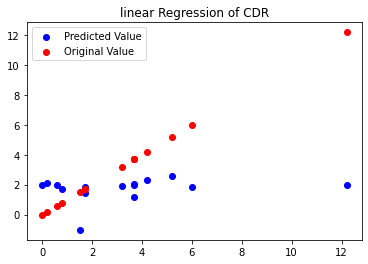

Linear Regression - R-Squared Value: -0.43316285342176264
Linear Regression - Root Mean Squared Error: 3.574501484554082


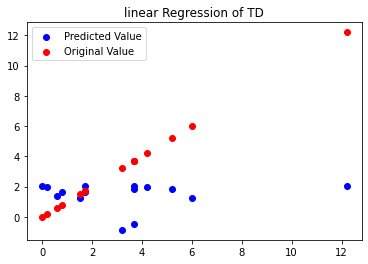

Linear Regression - R-Squared Value: -0.3341836399217658
Linear Regression - Root Mean Squared Error: 4.750964062497817


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


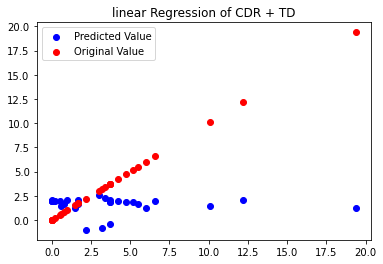

In [188]:
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )
for i in splitted_data:
  model,r2,rmse = linearRegression(splitted_data[i][0], splitted_data[i][2], splitted_data[i][1], splitted_data[i][3])
  plotGraph(y_test,model.predict(X_test),'linear Regression of '+i)


model,r2,rmse = linearRegression(X_train_All, y_train_All, X_test_All, y_test_All)
plotGraph(y_test_All,model.predict(X_test_All), "linear Regression of CDR + TD")


SVR Regression - R-Squared Value: -0.3125656772804468
SVR Regression - Root Mean Squared Error: 5.7192616119007225


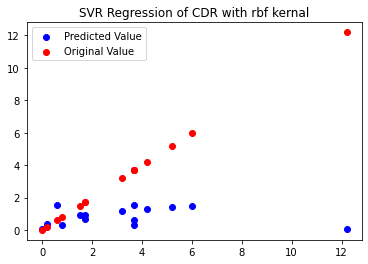

SVR Regression - R-Squared Value: -0.34730726485919927
SVR Regression - Root Mean Squared Error: 3.4657803577720414


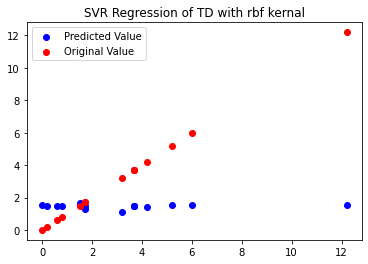

SVR Regression - R-Squared Value: -0.5126070199164545
SVR Regression - Root Mean Squared Error: 6.139634200342828


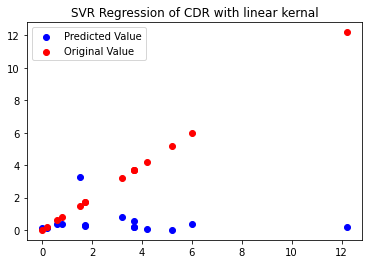

SVR Regression - R-Squared Value: -0.5615725140814618
SVR Regression - Root Mean Squared Error: 3.7312022303789356


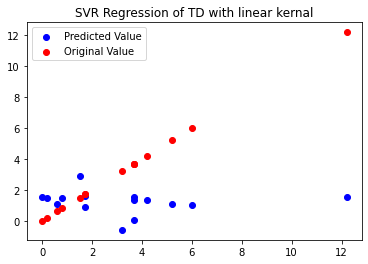

SVR Regression - R-Squared Value: -0.0210174864612509
SVR Regression - Root Mean Squared Error: 5.044243358758945


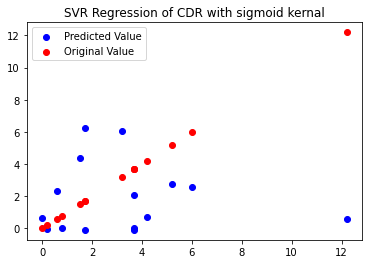

SVR Regression - R-Squared Value: -0.2911563501468777
SVR Regression - Root Mean Squared Error: 3.392791161018136


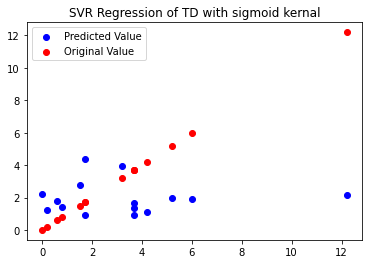

SVR Regression - R-Squared Value: -0.47188000961543963
SVR Regression - Root Mean Squared Error: 6.056415249639606


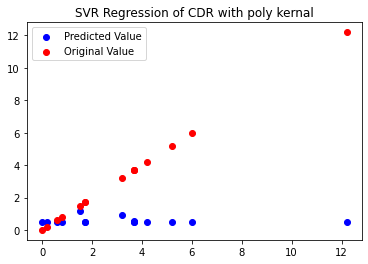

SVR Regression - R-Squared Value: -0.3527573653234257
SVR Regression - Root Mean Squared Error: 3.4727831358192445


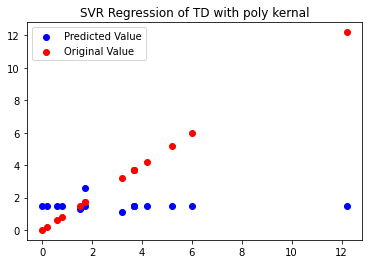

' Precomputed matrix must be a square matrix. Input is a 35x10 matrix.i dont use it '

In [190]:
#Model for SVR Regression (show also R-Squared Value and Root Mean Squared Error )
for i in splitted_data:
  model,r2,rmse = svrRegression(splitted_data[i][0], splitted_data[i][2], splitted_data[i][1], splitted_data[i][3],'rbf')
  plotGraph(y_test,model.predict(X_test),'SVR Regression of ' + i +" with rbf kernal")
"""CDR + TD not working on SVR regression"""
for i in splitted_data:
  model,r2,rmse = svrRegression(splitted_data[i][0], splitted_data[i][2], splitted_data[i][1], splitted_data[i][3],'linear')
  plotGraph(y_test,model.predict(X_test),'SVR Regression of ' + i +" with linear kernal")
"""CDR + TD not working on SVR regression"""
for i in splitted_data:
  model,r2,rmse = svrRegression(splitted_data[i][0], splitted_data[i][2], splitted_data[i][1], splitted_data[i][3],'sigmoid')
  plotGraph(y_test,model.predict(X_test),'SVR Regression of ' + i +" with sigmoid kernal")
"""CDR + TD not working on SVR regression"""
for i in splitted_data:
  model,r2,rmse = svrRegression(splitted_data[i][0], splitted_data[i][2], splitted_data[i][1], splitted_data[i][3],'poly')
  plotGraph(y_test,model.predict(X_test),'SVR Regression of ' + i +" with poly kernal")
"""CDR + TD not working on SVR regression"""
""" Precomputed matrix must be a square matrix. Input is a 35x10 matrix.i dont use it """

DecisionTreeRegressor - R-Squared Value: -0.5089778389695998
DecisionTreeRegressor - Root Mean Squared Error: 6.132264399605309


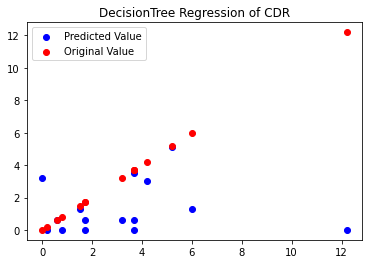

DecisionTreeRegressor - R-Squared Value: -0.7197423651754287
DecisionTreeRegressor - Root Mean Squared Error: 3.915609786482815


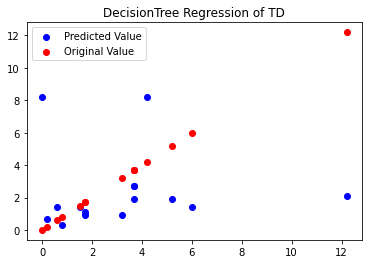

DecisionTreeRegressor - R-Squared Value: -0.5283958660620934
DecisionTreeRegressor - Root Mean Squared Error: 5.085010652234008


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


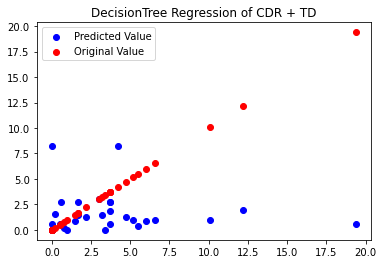

In [191]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
for i in splitted_data:
  model,r2,rmse = decisionTreeRegression(splitted_data[i][0], splitted_data[i][2], splitted_data[i][1], splitted_data[i][3])
  plotGraph(y_test,model.predict(X_test),'DecisionTree Regression of '+i)


model,r2,rmse = decisionTreeRegression(X_train_All, y_train_All, X_test_All, y_test_All)
plotGraph(y_test_All,model.predict(X_test_All), "DecisionTree Regression of CDR + TD")

Random Forest Tree Regression - R-Squared Value: -0.27579586228451625
Random Forest Tree Regression - Root Mean Squared Error: 5.638583750966785


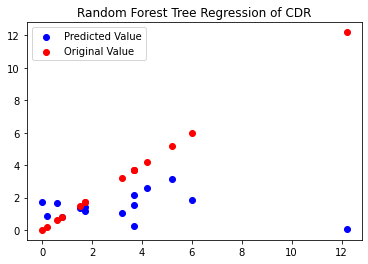

Random Forest Tree Regression - R-Squared Value: -0.11419782717828042
Random Forest Tree Regression - Root Mean Squared Error: 3.1517289713214027


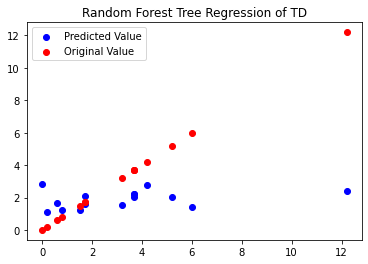

Random Forest Tree Regression - R-Squared Value: -0.2220765934664424
Random Forest Tree Regression - Root Mean Squared Error: 4.546981140685543


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


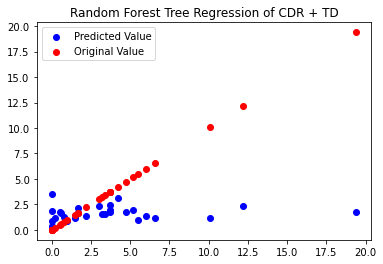

In [193]:
#Model for Random Forest Tree Regression (show also R-Squared Value and Root Mean Squared Error )
for i in splitted_data:
  model,r2,rmse = randomDecTreeRegression(splitted_data[i][0], splitted_data[i][2], splitted_data[i][1], splitted_data[i][3])
  plotGraph(y_test,model.predict(X_test),'Random Forest Tree Regression of '+i)


model,r2,rmse = randomDecTreeRegression(X_train_All, y_train_All, X_test_All, y_test_All)
plotGraph(y_test_All,model.predict(X_test_All), "Random Forest Tree Regression of CDR + TD")


MultiLayer Perceptron Regression - R-Squared Value: 0.20723182429709108
MultiLayer Perceptron Regression - Root Mean Squared Error: 4.444803282091624


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


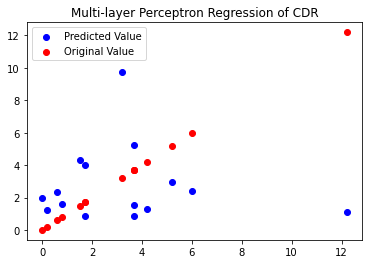

MultiLayer Perceptron Regression - R-Squared Value: -108.51019390114007
MultiLayer Perceptron Regression - Root Mean Squared Error: 31.246039987603258


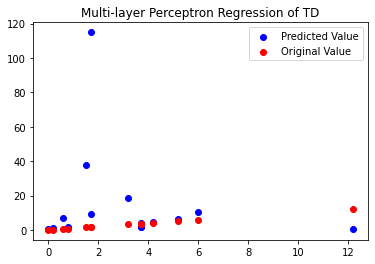

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


MultiLayer Perceptron Regression - R-Squared Value: 0.04639678086297302
MultiLayer Perceptron Regression - Root Mean Squared Error: 4.016592695182688


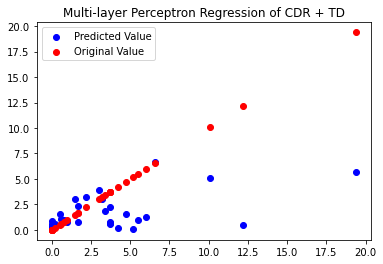

In [196]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )
for i in splitted_data:
  model,r2,rmse = mlpRegressor(splitted_data[i][0], splitted_data[i][2], splitted_data[i][1], splitted_data[i][3])
  plotGraph(y_test,model.predict(X_test),'Multi-layer Perceptron Regression of '+i)


model,r2,rmse = mlpRegressor(X_train_All, y_train_All, X_test_All, y_test_All)
plotGraph(y_test_All,model.predict(X_test_All), "Multi-layer Perceptron Regression of CDR + TD")

In this step 5, we will try to estimate Technical Debt using all internal and external metrics.

In [201]:
#split data into train and test data

# External metric = NOB V SH CS
External_metric = ['NOB', 'V', 'SH', 'CS']
# TD metrics = CDR TD
TD_metrics = ['CDR', 'TD']
# Internal metrics = NOC CBO RFC LOC CLOC FanIn FanOut LCOM WMC DIT
Internal_metrics = ['NOC', 'CBO', 'RFC', 'LOC', 'CLOC', 'FanIn', 'FanOut', 'LCOM', 'WMC', 'DIT']
# copy dataframe
Internal_External_metric_data = data.copy()
Internal_External_metric_data = Internal_External_metric_data[Internal_metrics + External_metric]

TD_metrics_data = data.copy()
TD_metrics_data = TD_metrics_data[TD_metrics]

splitted_data = {}
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = random_state_fixed)
for i in TD_metrics_data:
  X_train, X_test, y_train, y_test = train_test_split(Internal_External_metric_data, TD_metrics_data[i], test_size = 0.3, random_state = random_state_fixed)
  splitted_data[i] = [X_train, X_test, y_train, y_test]

X_train_All, X_test_All, y_train_All, y_test_All = train_test_split(Internal_External_metric_data, TD_metrics_data, test_size = 0.3, random_state = random_state_fixed)



Linear Regression - R-Squared Value: -2.0091415912957937
Linear Regression - Root Mean Squared Error: 8.659658238629229


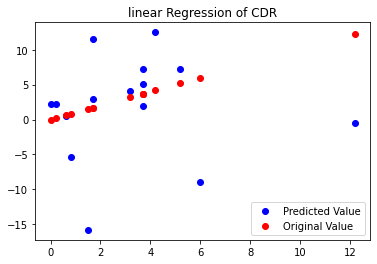

Linear Regression - R-Squared Value: -0.003633279100097697
Linear Regression - Root Mean Squared Error: 2.9912673938784247


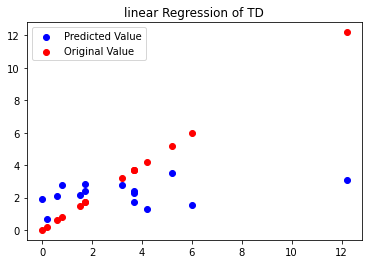

Linear Regression - R-Squared Value: -1.4807182273266988
Linear Regression - Root Mean Squared Error: 6.478323912538616


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


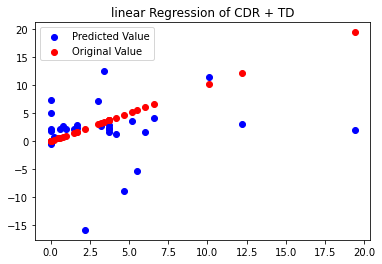

In [202]:
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )
for i in splitted_data:
  model,r2,rmse = linearRegression(splitted_data[i][0], splitted_data[i][2], splitted_data[i][1], splitted_data[i][3])
  plotGraph(y_test,model.predict(X_test),'linear Regression of '+i)

model,r2,rmse = linearRegression(X_train_All, y_train_All, X_test_All, y_test_All)
plotGraph(y_test_All,model.predict(X_test_All), "linear Regression of CDR + TD")

SVR Regression - R-Squared Value: -0.3148527101069667
SVR Regression - Root Mean Squared Error: 5.724242104107824


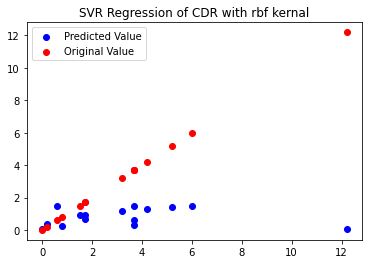

SVR Regression - R-Squared Value: -0.3492932469738723
SVR Regression - Root Mean Squared Error: 3.4683337631489524


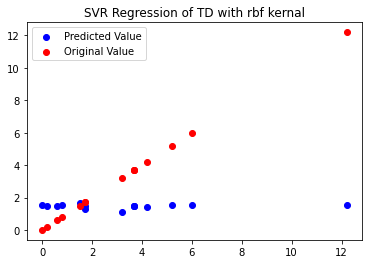

SVR Regression - R-Squared Value: -0.18530504653294907
SVR Regression - Root Mean Squared Error: 5.434936916169418


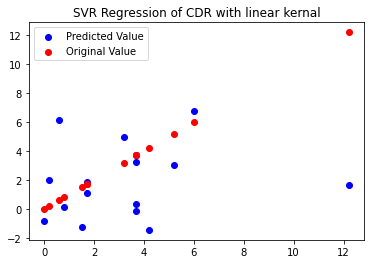

SVR Regression - R-Squared Value: -0.3265937966633323
SVR Regression - Root Mean Squared Error: 3.439035756641901


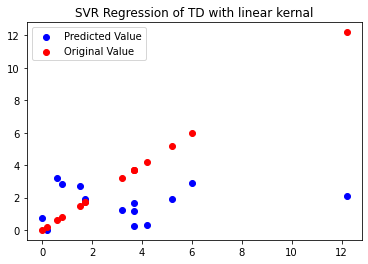

SVR Regression - R-Squared Value: -0.018777959607304107
SVR Regression - Root Mean Squared Error: 5.0387082332379585


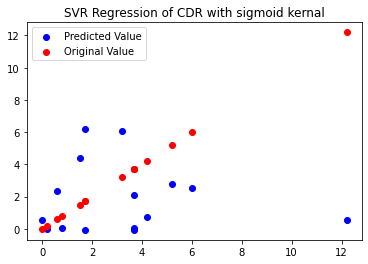

SVR Regression - R-Squared Value: -0.29834039900974885
SVR Regression - Root Mean Squared Error: 3.402216885104061


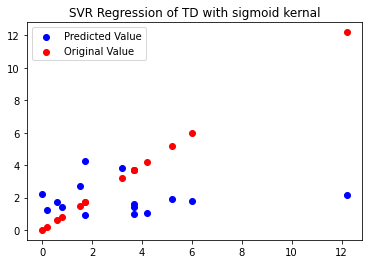

SVR Regression - R-Squared Value: -0.45388928971574694
SVR Regression - Root Mean Squared Error: 6.019287810193255


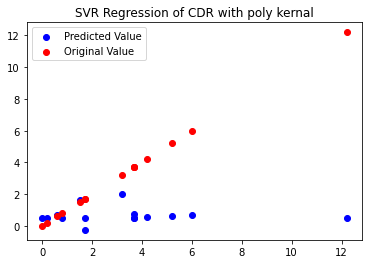

SVR Regression - R-Squared Value: -0.35875068207502014
SVR Regression - Root Mean Squared Error: 3.480467620690304


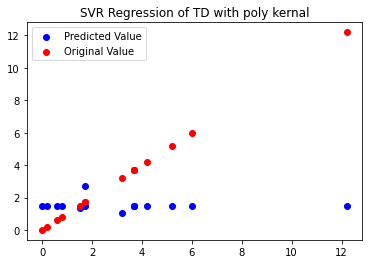

' Precomputed matrix must be a square matrix. Input is a 35x10 matrix.i dont use it '

In [203]:
#Model for SVR Regression (show also R-Squared Value and Root Mean Squared Error )
for i in splitted_data:
  model,r2,rmse = svrRegression(splitted_data[i][0], splitted_data[i][2], splitted_data[i][1], splitted_data[i][3],'rbf')
  plotGraph(y_test,model.predict(X_test),'SVR Regression of ' + i +" with rbf kernal")
"""CDR + TD not working on SVR regression"""
for i in splitted_data:
  model,r2,rmse = svrRegression(splitted_data[i][0], splitted_data[i][2], splitted_data[i][1], splitted_data[i][3],'linear')
  plotGraph(y_test,model.predict(X_test),'SVR Regression of ' + i +" with linear kernal")
"""CDR + TD not working on SVR regression"""
for i in splitted_data:
  model,r2,rmse = svrRegression(splitted_data[i][0], splitted_data[i][2], splitted_data[i][1], splitted_data[i][3],'sigmoid')
  plotGraph(y_test,model.predict(X_test),'SVR Regression of ' + i +" with sigmoid kernal")
"""CDR + TD not working on SVR regression"""
for i in splitted_data:
  model,r2,rmse = svrRegression(splitted_data[i][0], splitted_data[i][2], splitted_data[i][1], splitted_data[i][3],'poly')
  plotGraph(y_test,model.predict(X_test),'SVR Regression of ' + i +" with poly kernal")
"""CDR + TD not working on SVR regression"""
""" Precomputed matrix must be a square matrix. Input is a 35x10 matrix.i dont use it """


DecisionTreeRegressor - R-Squared Value: -0.009659113202096004
DecisionTreeRegressor - Root Mean Squared Error: 5.016107388536786


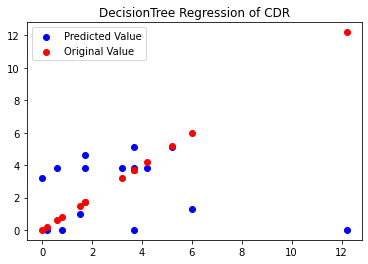

DecisionTreeRegressor - R-Squared Value: 0.17460143374178705
DecisionTreeRegressor - Root Mean Squared Error: 2.7126862455261325


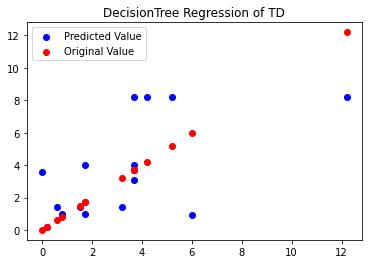

DecisionTreeRegressor - R-Squared Value: -0.16686676089046776
DecisionTreeRegressor - Root Mean Squared Error: 4.443084514163556


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


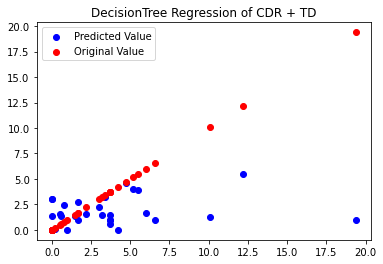

In [204]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
for i in splitted_data:
  model,r2,rmse = decisionTreeRegression(splitted_data[i][0], splitted_data[i][2], splitted_data[i][1], splitted_data[i][3])
  plotGraph(y_test,model.predict(X_test),'DecisionTree Regression of '+i)


model,r2,rmse = decisionTreeRegression(X_train_All, y_train_All, X_test_All, y_test_All)
plotGraph(y_test_All,model.predict(X_test_All), "DecisionTree Regression of CDR + TD")


Random Forest Tree Regression - R-Squared Value: 0.058937892579818296
Random Forest Tree Regression - Root Mean Squared Error: 4.842711354878241


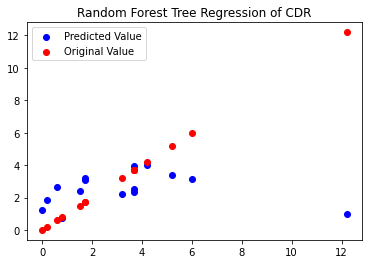

Random Forest Tree Regression - R-Squared Value: 0.1010440491739536
Random Forest Tree Regression - Root Mean Squared Error: 2.83098074878654


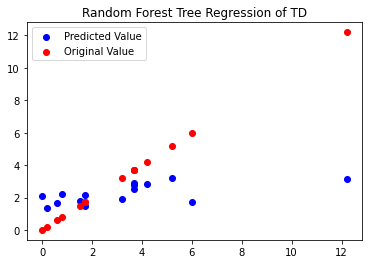

Random Forest Tree Regression - R-Squared Value: -0.10582502745275257
Random Forest Tree Regression - Root Mean Squared Error: 4.325309083368108


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


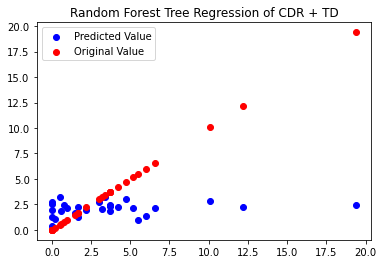

In [206]:
#Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
for i in splitted_data:
  model,r2,rmse = randomDecTreeRegression(splitted_data[i][0], splitted_data[i][2], splitted_data[i][1], splitted_data[i][3])
  plotGraph(y_test,model.predict(X_test),'Random Forest Tree Regression of '+i)

model,r2,rmse = randomDecTreeRegression(X_train_All, y_train_All, X_test_All, y_test_All)
plotGraph(y_test_All,model.predict(X_test_All), "Random Forest Tree Regression of CDR + TD")

MultiLayer Perceptron Regression - R-Squared Value: -1.532075406404396
MultiLayer Perceptron Regression - Root Mean Squared Error: 7.94360715551718


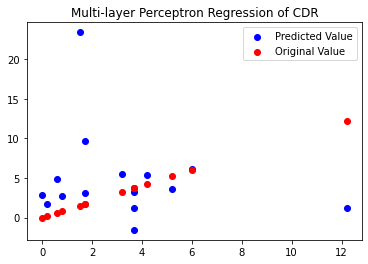

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MultiLayer Perceptron Regression - R-Squared Value: -0.7069740854881932
MultiLayer Perceptron Regression - Root Mean Squared Error: 3.90104692332381


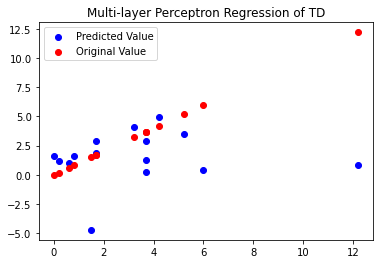

MultiLayer Perceptron Regression - R-Squared Value: -20.797453452845307
MultiLayer Perceptron Regression - Root Mean Squared Error: 19.20334212421181


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


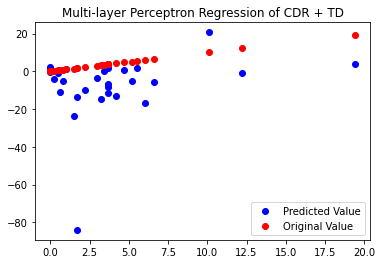

In [207]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )
for i in splitted_data:
  model,r2,rmse = mlpRegressor(splitted_data[i][0], splitted_data[i][2], splitted_data[i][1], splitted_data[i][3])
  plotGraph(y_test,model.predict(X_test),'Multi-layer Perceptron Regression of '+i)


model,r2,rmse = mlpRegressor(X_train_All, y_train_All, X_test_All, y_test_All)
plotGraph(y_test_All,model.predict(X_test_All), "Multi-layer Perceptron Regression of CDR + TD")